In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

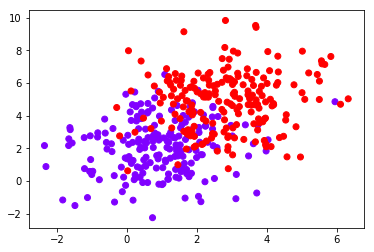

In [2]:
# Set seed for reproducibility
np.random.seed(2400)

# Generate Multivariate normal clusters
mu_1 = np.array([1,2])
mu_2 = np.array([3,5])
sigma = np.array([[1.6,0.2],[0.2,2.8]])
N = 200

normal_1 = np.random.multivariate_normal(mu_1, sigma, N)
normal_2 = np.random.multivariate_normal(mu_2, sigma, N)

#Convert into data matrix with two features `X1`, `X2` and target `Y`
Y = np.zeros(2*N, dtype=int)
Y[N:].fill(1)
X1 = np.append(normal_1[:,0], normal_2[:,0])
X2 = np.append(normal_1[:,1], normal_2[:,1])

data = np.array([X1,X2,Y]).T

#Visualize the data
plt.scatter(data[:,0], data[:,1], c=Y, cmap='rainbow');

In [3]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[:,:2].reshape(-1,2), data[:,2], test_size=0.33, 
                                                    random_state=246)

# Initialize linear and quadratic discriminant analysis ojbects and fit data
lin_disc  = LinearDiscriminantAnalysis().fit(X_train, y_train)
quad_disc = QuadraticDiscriminantAnalysis().fit(X_train, y_train)

# Compute prediction errors
print 'Linear discriminant prediction accuracy    : %r' % round(lin_disc.score(X_test, y_test),2)
print 'Quadratic discriminant prediction accuracy : %r' % round(quad_disc.score(X_test, y_test),2)

Linear discriminant prediction accuracy    : 0.9
Quadratic discriminant prediction accuracy : 0.9
